In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import reuters       # 로이터 뉴스 데이터셋 불러오기
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 데이터를 불러와 학습셋, 테스트셋으로 나눕니다.
(X_train, y_train), (X_test, y_test) = reuters.load_data(
    num_words=1000,
    # 임베딩 층을 설정할 때 사용하는 매개변수
    # 단어 사전의 크기 지정
    
    # 자주 등장하는 상위 1000개의 단어만을 사용하는 경우 유용하다
    # 단어 사전의 크기를 제한하여 메모리 사용을 줄이고 계산 효율성을 높인다
    test_split=0.2)

In [4]:
# 데이터를 확인해 보겠습니다.
category = np.max(y_train) + 1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print(X_train[0])

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [5]:
# 단어의 수를 맞추어 줍니다. 
X_train = sequence.pad_sequences(X_train, maxlen=100)
X_test = sequence.pad_sequences(X_test, maxlen=100)

# 원-핫 인코딩 처리를 합니다.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
# 모델의 구조를 설정합니다.
model = Sequential()
model.add(Embedding(1000, 100))
# (입력 단어의 사전 크기, 각 단어가 매핑될 임베딩 벡터의 차원)
model.add(LSTM(100, activation='tanh'))
# LSTM 층은 100개의 상태를 갖는 메모리 셀을 가지고,시퀀스 정보를 처리합니다
# 하이퍼볼릭 탄젠트
model.add(Dense(46, activation='softmax'))

In [7]:
# 모델의 실행 옵션을 정합니다.
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 학습의 조기 중단을 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss',
                                        patience=5)

# 모델을 실행합니다.
history = model.fit(X_train, y_train, batch_size=20,
                    epochs=200, validation_data=(X_test, y_test),
                    callbacks=[early_stopping_callback])

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

Epoch 1/200
450/450 [==============================] - 8s 12ms/step - loss: 2.2623 - accuracy: 0.4228 - val_loss: 1.9989 - val_accuracy: 0.5085
Epoch 2/200
450/450 [==============================] - 5s 11ms/step - loss: 1.8002 - accuracy: 0.5444 - val_loss: 1.7278 - val_accuracy: 0.5601
Epoch 3/200
450/450 [==============================] - 5s 11ms/step - loss: 1.5822 - accuracy: 0.6073 - val_loss: 1.5580 - val_accuracy: 0.6158
Epoch 4/200
450/450 [==============================] - 5s 11ms/step - loss: 1.3532 - accuracy: 0.6621 - val_loss: 1.3494 - val_accuracy: 0.6625
Epoch 5/200
450/450 [==============================] - 5s 11ms/step - loss: 1.2054 - accuracy: 0.6957 - val_loss: 1.2784 - val_accuracy: 0.6812
Epoch 6/200
450/450 [==============================] - 5s 11ms/step - loss: 1.0890 - accuracy: 0.7261 - val_loss: 1.1995 - val_accuracy: 0.7097
Epoch 7/200
450/450 [==============================] - 5s 11ms/step - loss: 0.9907 - accuracy: 0.7512 - val_loss: 1.1599 - val_accuracy:

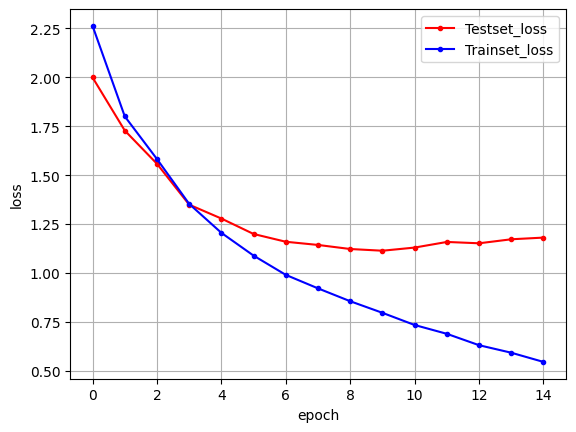

In [8]:
# 학습셋과 테스트셋의 오차를 저장합니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 보겠습니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시하겠습니다. 
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()